In [1]:
# https://www.tensorflow.org/tutorials/load_data/images

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

# AUTOTUNE = tf.data.experimental.AUTOTUNE



In [2]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import glob

In [4]:
tf.__version__

'2.0.0'

In [6]:
import pathlib

In [10]:
data_dir = pathlib.Path("/Users/j/Desktop/programming/ML/github/image_recognition/dogs vs cats datasets/Data/train")
data_dir

PosixPath('/Users/j/Desktop/programming/ML/github/image_recognition/dogs vs cats datasets/Data/train')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

25000

In [15]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])
CLASS_NAMES

array(['cat', 'dog'], dtype='<U3')

In [16]:
for item in data_dir.glob('*'):
    print(item.name)

cat
.DS_Store
dog


# loading the data using tf.keras.preprocessing


In [20]:
# The 1./255 is to convert from uint8 to float32 in range [0,1]. Better for d\feeding to a neural net
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [21]:
BATCH_SIZE = 32
#  Batch Sixe is how many images are we feeding in on one batch. It can be set to none. It is important to set it
# to optimise computing power
IMG_HEIGHT = 50
IMG_WIDTH = 50
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [26]:
print(data_dir)
print()
print()
print(list(CLASS_NAMES))

/Users/j/Desktop/programming/ML/github/image_recognition/dogs vs cats datasets/Data/train


['cat', 'dog']


In [23]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 25000 images belonging to 2 classes.


# inspecting a batch

In [24]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

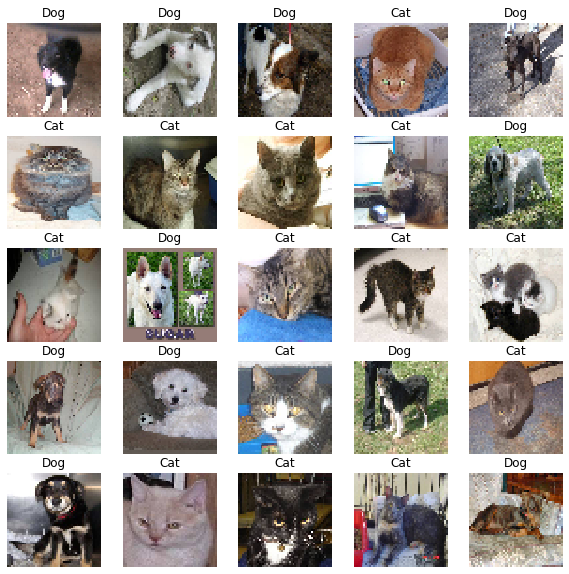

In [25]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)